<a href="https://colab.research.google.com/github/NellKree/MLlab/blob/main/MLlab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [30]:
#!pip install cartopy
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature

In [29]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

GDRIVE_DATASET_PATH = f'drive/MyDrive/nuclear_power_plants.csv'

#Загрузка датасета, вывод базовой сводной информации

In [21]:
df = pd.read_csv(GDRIVE_DATASET_PATH)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   803 non-null    int64  
 1   Name                 803 non-null    object 
 2   Latitude             759 non-null    float64
 3   Longitude            759 non-null    float64
 4   Country              803 non-null    object 
 5   CountryCode          803 non-null    object 
 6   Status               803 non-null    object 
 7   ReactorType          794 non-null    object 
 8   ReactorModel         713 non-null    object 
 9   ConstructionStartAt  722 non-null    object 
 10  OperationalFrom      636 non-null    object 
 11  OperationalTo        212 non-null    object 
 12  Capacity             724 non-null    float64
 13  LastUpdatedAt        733 non-null    object 
 14  Source               803 non-null    object 
 15  IAEAId               713 non-null    flo

In [32]:
N = 10
df.head(N)

,Id,Name,Latitude,Longitude,Country,CountryCode,Status,ReactorType,ReactorModel,ConstructionStartAt,OperationalFrom,OperationalTo,Capacity,LastUpdatedAt,Source,IAEAId,construction_year,operational_year
0,1,Ågesta,59.206000,18.082900,Sweden,SE,Shutdown,PHWR,NaN,1957-12-01,1964-05-01,1974-06-02,9.0,2015-05-24T04:51:37+03:00,WNA/IAEA,528.0,1957.0,1964.0
1,2,Akademik Lomonosov-1,69.709579,170.306250,Russia,RU,Operational,PWR,KLT-40S 'Floating',2007-04-15,2020-05-22,NaN,30.0,2021-05-31,WNA/IAEA/Google Maps,895.0,2007.0,2020.0
2,3,Akademik Lomonosov-2,69.709579,170.306250,Russia,RU,Operational,PWR,KLT-40S 'Floating',2007-04-15,2020-05-22,NaN,30.0,2021-05-31,WNA/IAEA/Google Maps,896.0,2007.0,2020.0
5,6,Akkuyu-1,36.144444,33.541111,Türkiye,TR,Under Construction,PWR,VVER V-509,2018-04-03,NaT,NaN,1114.0,2018-07-01T01:21:08+03:00,WNA/Wikipedia/IAEA,553.0,2018.0,NaN
6,7,Akkuyu-2,36.144444,33.541111,Türkiye,TR,Under Construction,PWR,VVER V-509,2020-04-08,NaT,NaN,1114.0,2020-08-31T01:39:56+03:00,Wikipedia/IAEA,1080.0,2020.0,NaN
7,8,Akkuyu-3,36.144444,33.541111,Türkiye,TR,Under Construction,PWR,VVER V-509,2021-03-10,NaT,NaN,1114.0,2021-04-20T02:47:37+03:00,Wikipedia/IAEA,1081.0,2021.0,NaN
8,9,Akkuyu-4,36.144444,33.541111,Türkiye,TR,Under Construction,PWR,VVER V-509,2022-07-21,NaT,NaN,1114.0,2022-09-24T22:33:57+03:00,Wikipedia/IAEA,1082.0,2022.0,NaN
9,10,Aktau (Shevchenko),43.607000,51.283000,Kazakhstan,KZ,Shutdown,FBR,BN-350,1964-10-01,1973-07-16,1999-04-22,52.0,2021-10-01T00:14:53+03:00,WNA/IAEA,414.0,1964.0,1973.0
10,11,Almaraz-1,39.807000,-5.698000,Spain,ES,Operational,PWR,WH 3LP,1973-07-03,1983-09-01,NaN,900.0,2017-02-10T23:56:15+02:00,WNA/IAEA,153.0,1973.0,1983.0
11,12,Almaraz-2,39.807000,-5.698000,Spain,ES,Operational,PWR,WH 3LP,1973-07-03,1984-07-01,NaN,900.0,2019-06-02T20:17:55+03:00,WNA/IAEA,154.0,1973.0,1984.0


# Количество открытых и введённых в эксплуатацию станций

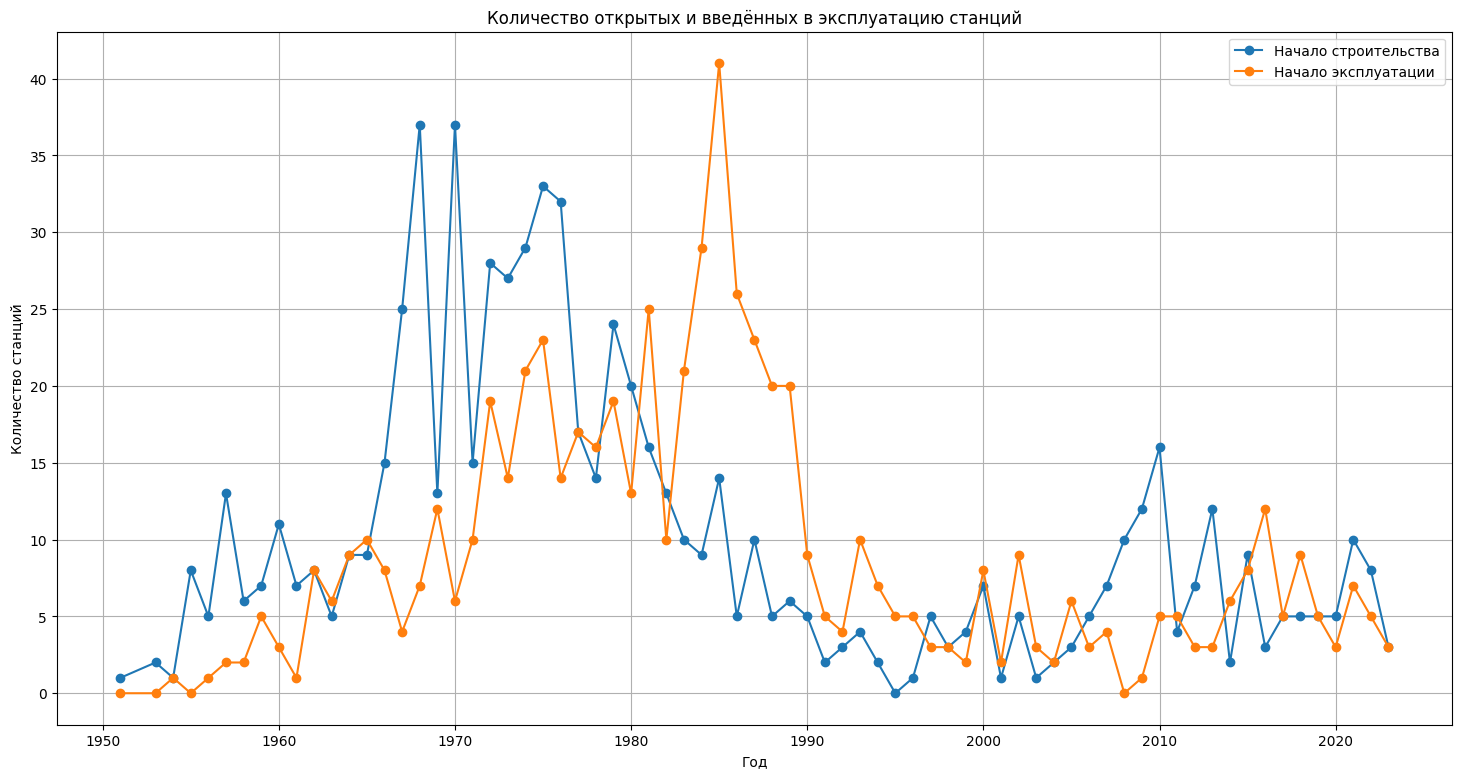

In [23]:
df['ConstructionStartAt'] = pd.to_datetime(df['ConstructionStartAt'])
df['OperationalFrom'] = pd.to_datetime(df['OperationalFrom'])

df['construction_year'] = df['ConstructionStartAt'].dt.year
df['operational_year'] = df['OperationalFrom'].dt.year

construction_counts = df['construction_year'].value_counts().sort_index()
operational_counts = df['operational_year'].value_counts().sort_index()

years = sorted(set(construction_counts.index) | set(operational_counts.index))

construction_counts = construction_counts.reindex(years, fill_value=0)
operational_counts = operational_counts.reindex(years, fill_value=0)

plt.figure(figsize=(18, 9))
plt.plot(years, construction_counts, label='Начало строительства', marker='o')
plt.plot(years, operational_counts, label='Начало эксплуатации', marker='o')

plt.locator_params(axis='y', tight=True, nbins=15)
plt.xlabel('Год')
plt.ylabel('Количество станций')
plt.title('Количество открытых и введённых в эксплуатацию станций')
plt.legend()

plt.grid(True)
plt.show()


# Количество атомных электростанций по странам

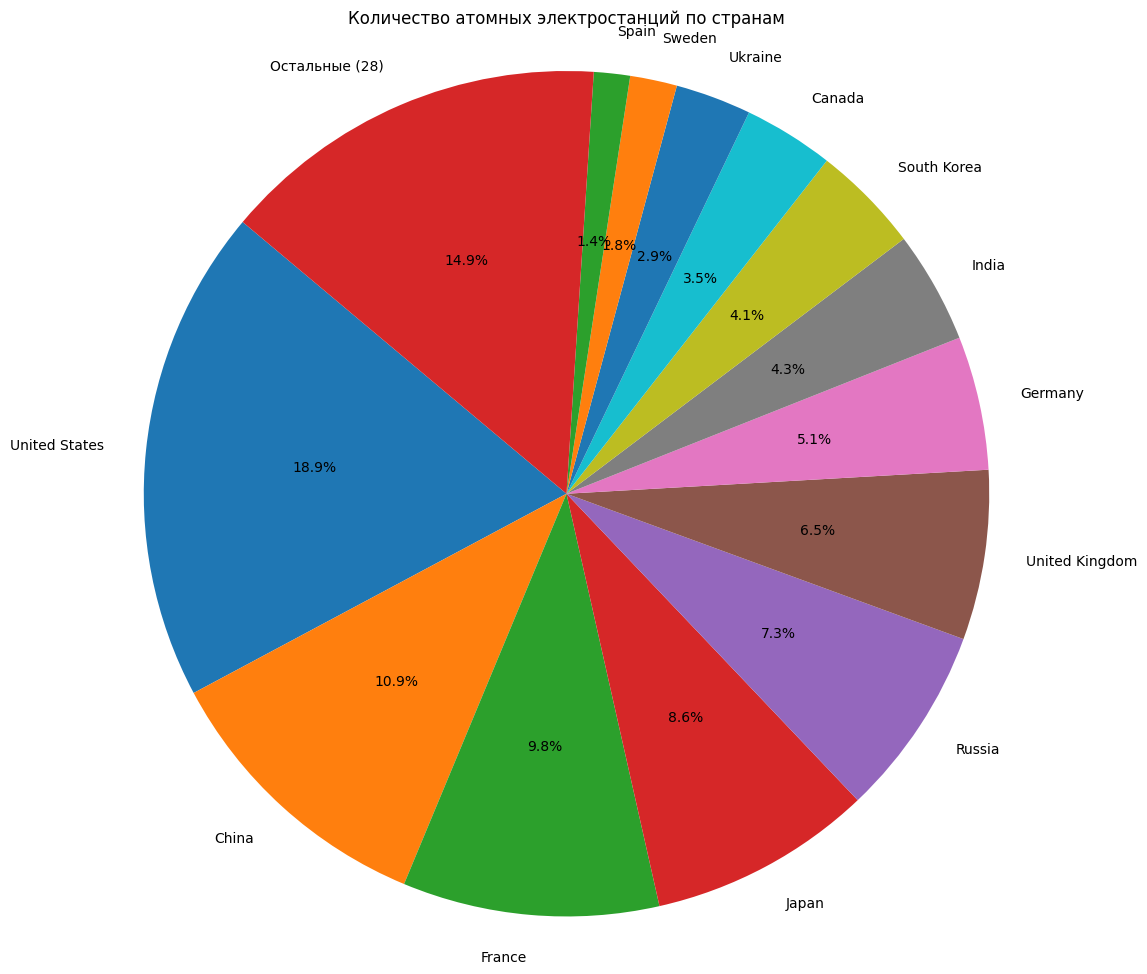

In [34]:
threshold = 10

country_counts = df['Country'].value_counts()

countries_below_threshold = country_counts[country_counts <= threshold]
count_countries_below_threshold = len(countries_below_threshold)

other_count = country_counts[country_counts < threshold].sum()
country_counts = country_counts[country_counts >= threshold]
country_counts[f'Остальные ({count_countries_below_threshold})'] = other_count

plt.figure(figsize=(12, 12))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Количество атомных электростанций по странам')

plt.axis('equal')  # Для круговой формы диаграммы
plt.show()

# Статусы атомных электростанций

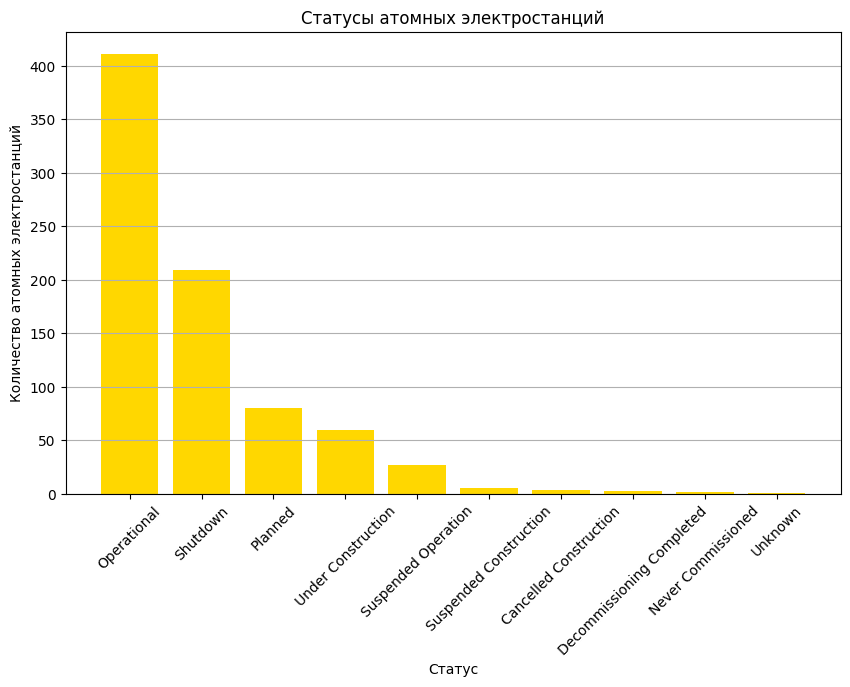

In [25]:
status_counts = df['Status'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(status_counts.index, status_counts.values, color='gold')

plt.xlabel('Статус')
plt.ylabel('Количество атомных электростанций')
plt.title('Статусы атомных электростанций')

plt.grid(axis='y')

plt.xticks(rotation=45)
plt.show()

# Мощности атомных электростанций по типам реакторов

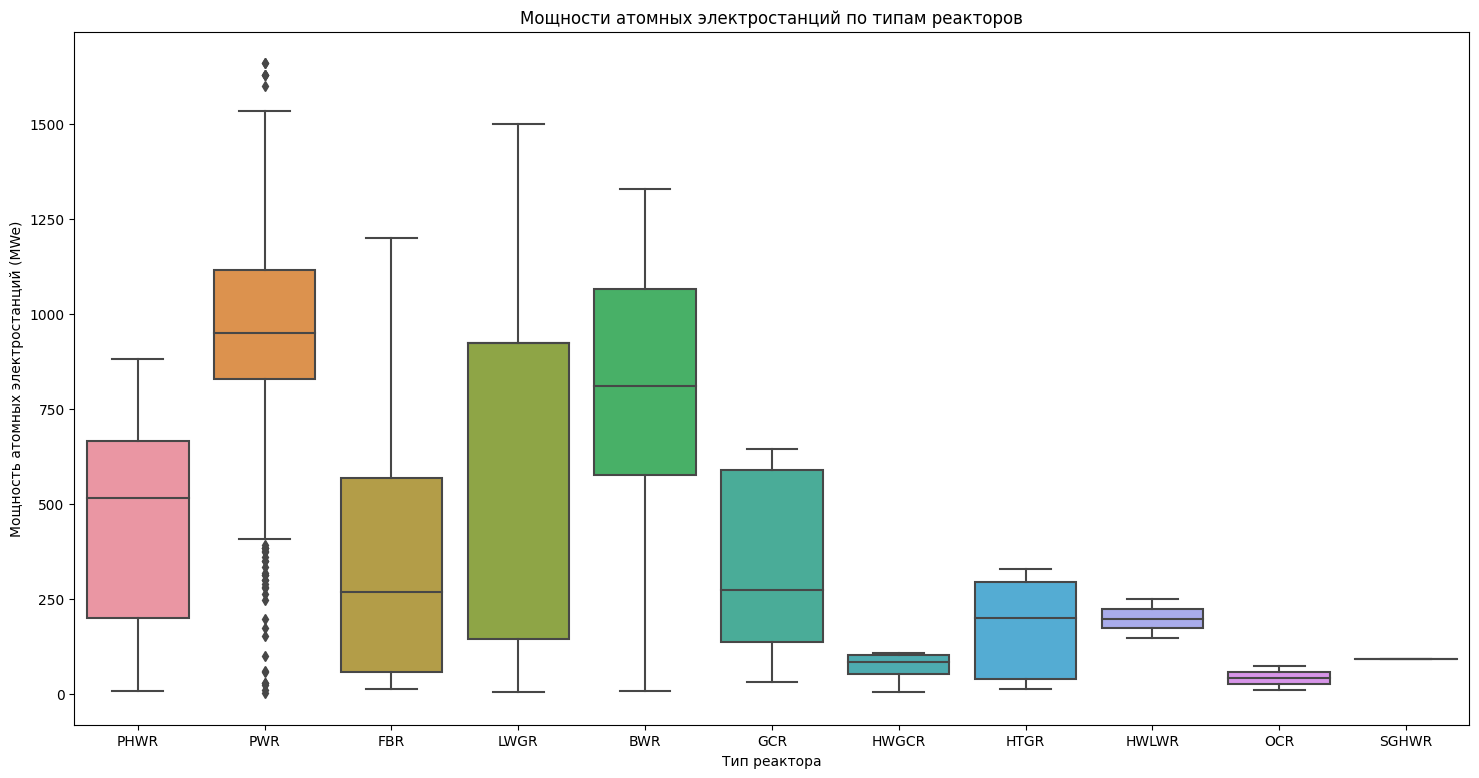

In [26]:
df = df.dropna(subset=['Capacity'])

reactor_types_with_data = df['ReactorType'].unique()

plt.figure(figsize=(18, 9))
sns.boxplot(x='ReactorType', y='Capacity', data=df[df['ReactorType'].isin(reactor_types_with_data)], palette='Set3')

plt.xlabel('Тип реактора')
plt.ylabel('Мощность атомных электростанций (MWe)')
plt.title('Mощности атомных электростанций по типам реакторов')

plt.show()

# Атомные электростанции в Европе

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


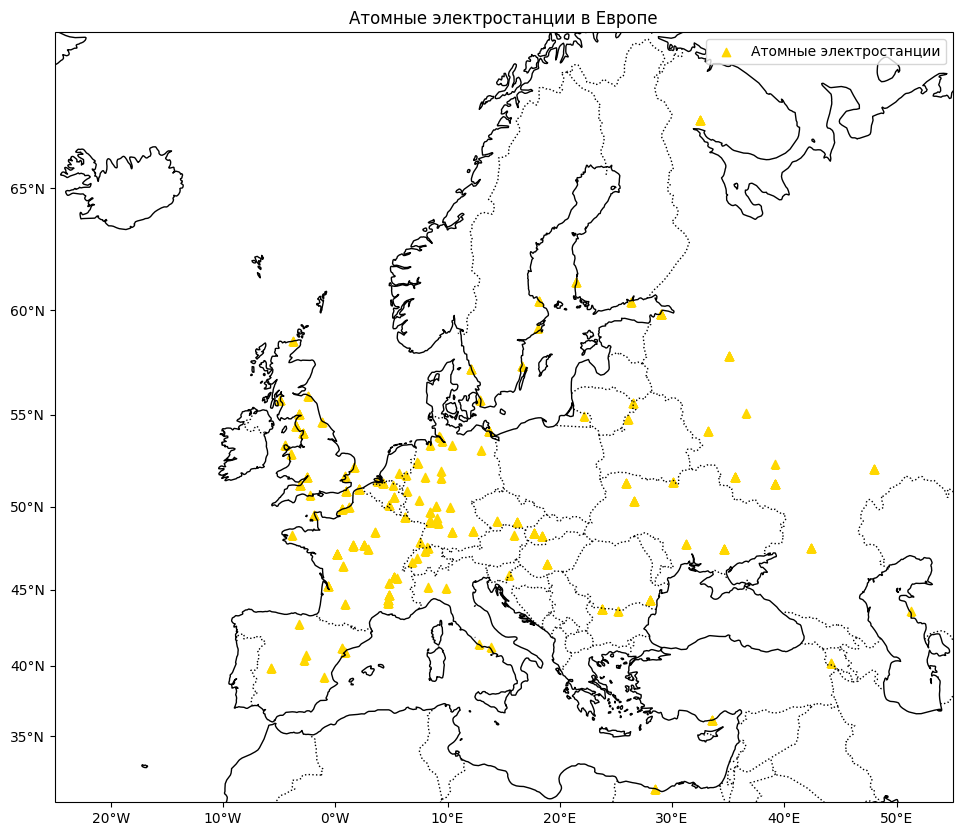

In [31]:
plt.figure(figsize=(20,10))
ax = plt.axes(projection = ccrs.Mercator())
ax. coastlines('50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')


ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)

ax.set_yticks([35, 40, 45, 50, 55, 60, 65], crs=ccrs.PlateCarree())
ax.set_xticks([-20,-10, 0,10, 20,30, 40,50], crs=ccrs.PlateCarree())


lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-25, 55, 30, 65])


plt.scatter(df['Longitude'], df['Latitude'], marker='^', color='gold', label='Атомные электростанции', transform = ccrs.PlateCarree())

ax.legend()
ax.set_title('Атомные электростанции в Европе')

plt.show()